In [1]:
url='https://data.nasa.gov/resource/y77d-th95.json'
import requests
import pandas as pd
from datetime import datetime
class Meteorite:
    def __init__(self,url):
        self.url=url
    def download(self):
        file_name='nasa_data'
        csv_file_name='nasa1.csv'
        response=requests.get(self.url)
        if response.status_code==200:
            with open(file_name,'wb') as file:
                file.write(response.content)
        df=pd.read_json(file_name)
        a=df.to_csv(csv_file_name)
        
        print('successfully file is downloaded')
        #print(df.head())
        df=pd.read_csv(csv_file_name,usecols=['name','id','nametype','recclass','mass','year',\
                                          'reclat','reclong','geolocation'])
        return df
    def renaming_column(self):
        df=self.download()
        
        
        df.columns=['Name of Earth Meteorite','ID of Earth Meteorite','nametype','recclass',\
             'Mass of Earth Meteorite','Year at which Earth Meteorite was hit','reclat','recclong',\
                     'point coordinates']
        
        df=df.dropna() # Removing null values
        return df
    def datatype(self):
        df=self.renaming_column()
        df['ID of Earth Meteorite']=df['ID of Earth Meteorite'].astype(int) # - ID of Earth Meteorite - int 
        df['Mass of Earth Meteorite']=df['Mass of Earth Meteorite'].astype(float) # mass - Mass of Earth Meteorite
        df['reclat']=df['reclat'].astype(float) # reclat - float
        df['recclong']=df['recclong'].astype(float) # t recclong - float
        
        # t year - Year at which Earth Meteorite was hit - datetime format reclat -
        df['Year at which Earth Meteorite was hit'] = df['Year at which Earth Meteorite was hit'].str.split('T').str[0]
        
         
        df['Year at which Earth Meteorite was hit']= pd.to_datetime(df['Year at which Earth Meteorite was hit']\
                                                         ,errors='coerce')
        return df
    
    def coordinates(self): #point coordinates - list of int

        df=self.datatype()
        def jsonify(i):
            
            a=eval(i)['coordinates']
            x=[int(i) for i in a]
            return x
        df['point coordinates']=df['point coordinates'].apply(jsonify)
        
        return df
a=Meteorite(url)
df=a.coordinates()
df.head()
df.dtypes
     

successfully file is downloaded


Name of Earth Meteorite                          object
ID of Earth Meteorite                             int32
nametype                                         object
recclass                                         object
Mass of Earth Meteorite                         float64
Year at which Earth Meteorite was hit    datetime64[ns]
reclat                                          float64
recclong                                        float64
point coordinates                                object
dtype: object

In [3]:
# ● Get all the Earth meteorites that fell before the year 2000
#For this question we have to create a histogram
filtered_earth_meteorites = df[df['Year at which Earth Meteorite was hit'].dt.year < 2000]
filtered_earth_meteorites.head()

,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,recclong,point coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6, 50]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10, 56]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99, 16]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64, -33]"


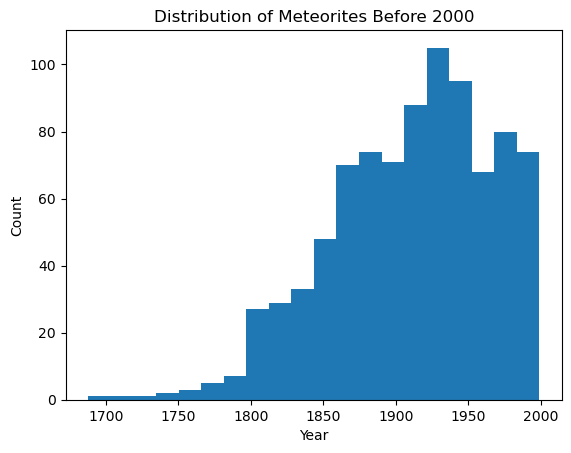

In [4]:
import matplotlib.pyplot as plt
plt.hist(filtered_earth_meteorites['Year at which Earth Meteorite was hit'].dt.year, bins=20)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Meteorites Before 2000')
plt.show()

In [5]:
#  Get all the earth meteorites co-ordinates who fell before the year 1970

In [6]:
filtered_earth_meteorites = df[df['Year at which Earth Meteorite was hit'].dt.year < 1970]
filtered_earth_meteorites.head()

,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,recclong,point coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6, 50]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10, 56]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64, -33]"
5,Adhi Kot,379,Valid,EH4,4239.0,1919-01-01,32.10000,71.80000,"[71, 32]"


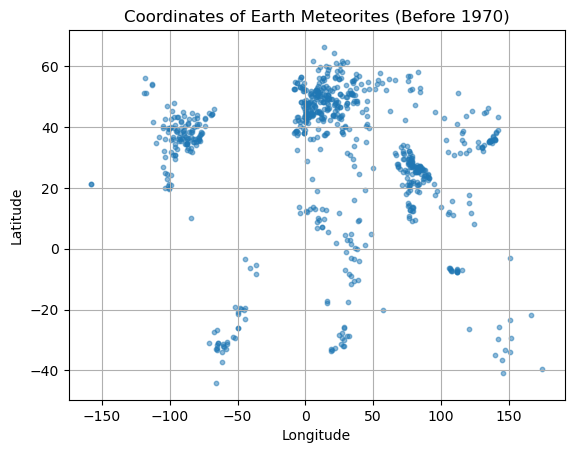

In [7]:
coordinates = filtered_earth_meteorites[['reclat', 'recclong']]

# Creating a scatter plot of the coordinates
plt.scatter(coordinates['recclong'], coordinates['reclat'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates of Earth Meteorites (Before 1970)')
plt.grid(True)
plt.show()

In [11]:
# Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
mass_of_meteorite=df[df['Mass of Earth Meteorite']>10000]
mass_of_meteorite.head()

,Name of Earth Meteorite,ID of Earth Meteorite,nametype,recclass,Mass of Earth Meteorite,Year at which Earth Meteorite was hit,reclat,recclong,point coordinates
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54]"
7,Agen,392,Valid,H5,30000.0,1814-01-01,44.21667,0.61667,"[0, 44]"
11,Aïr,424,Valid,L6,24000.0,1925-01-01,19.08333,8.38333,"[8, 19]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981-01-01,39.91667,42.81667,"[42, 39]"
27,Alfianello,466,Valid,L6,228000.0,1883-01-01,45.26667,10.15000,"[10, 45]"


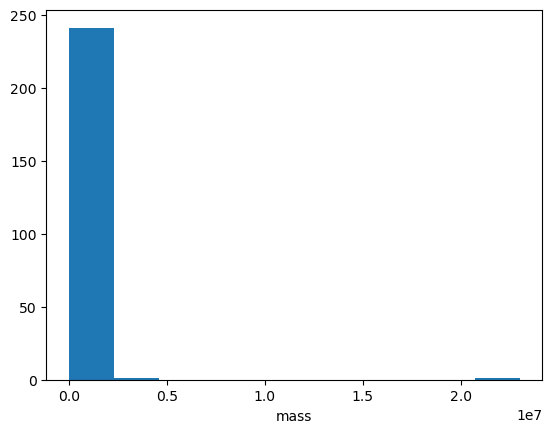

In [10]:
plt.hist(mass_of_meteorite['Mass of Earth Meteorite'],bins=10)
plt.xlabel('mass')
plt.show()